In [1]:
# SETUP
## Importing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## Random params
np.random.seed(0)
cv = 0
random_state = 338

## Plot params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

In [2]:
## Load train and test
test = pd.read_csv('../test.csv', index_col='id')
dT = pd.read_csv('../train.csv', index_col='id')
dT.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
id,,,,,,,,,,,,,,,,,,,,,
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [3]:
X = dT.drop('claim',axis =1).copy()
y = dT['claim']
# print(y.head())

test = test.fillna(test.mean())
X= X.fillna(X.mean())

# log = np.log(X)
# log.columns = X.columns +'_log'
# X[log.columns] = log

# logT = np.log(scaledTest);
# logT.columns = scaledTest.columns+'_log'
# scaledTest[logT.columns] = logT

# scaledTest.replace([np.inf, -np.inf], np.nan, inplace=True)
test = test.fillna(test.mean())
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
X= X.fillna(X.mean())

X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
id,,,,,,,,,,,,,,,,,,,,,
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.100000,1.01770
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.000000,0.28359
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.200000,0.40690
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-0.01182,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.100000,0.51486
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,0.92739,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,3959.204669,0.23049


In [4]:
## Selecting features (previously run selection section)
# selected:
# feats_DF = pd.read_csv('./selection_50_df.csv')
# selected = feats_DF['Feature'].head(50).values
# train = dT[selected[:]].copy()
# train['claim'] = dT['claim'].copy()

# full:
X = X.copy()

X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
id,,,,,,,,,,,,,,,,,,,,,
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.100000,1.01770
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.000000,0.28359
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.200000,0.40690
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-0.01182,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.100000,0.51486
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,0.92739,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,3959.204669,0.23049


In [5]:
# Basic clean and inputing:
# from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import QuantileTransformer # the best
# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer # errei testando :s

scaler = Normalizer()
scaler1 = QuantileTransformer()
scaler2 = Normalizer()
scaler3 = QuantileTransformer()

scaler.fit(X)
scaler1.fit(X)

scaledTrain = pd.DataFrame(scaler.transform(X))
scaledTrain.index = X.index
scaledTrain.columns = X.columns

scaledTrain = pd.DataFrame(scaler1.transform(scaledTrain))
scaledTrain.index = scaledTrain.index
scaledTrain.columns = scaledTrain.columns

scaledTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.03972,0.046035,0.083611,0.061839,0.061458,0.572773,0.033355,0.015161,0.125732,0.159494,...,0.014996,0.983614,0.0,0.314955,0.448088,0.097224,0.0,0.136747,0.021724,0.018523
1,0.03972,0.046035,0.083611,0.061839,0.061458,0.572773,0.033355,0.015161,0.125732,0.159494,...,0.014996,0.983614,0.0,0.314955,0.448088,0.097224,0.0,0.136747,0.021724,0.018523
2,0.03972,0.046035,0.083611,0.061839,0.061458,0.572773,0.033355,0.015161,0.125732,0.159494,...,0.014996,0.983614,0.0,0.314955,0.448088,0.097224,0.0,0.136747,0.021724,0.018523
3,0.03972,0.046035,0.083611,0.061839,0.061458,0.572773,0.033355,0.015161,0.125732,0.159494,...,0.014996,0.983614,0.0,0.314955,0.448088,0.097224,0.0,0.136747,0.021724,0.018523
4,0.03972,0.046035,0.083611,0.061839,0.061458,0.572773,0.033355,0.015161,0.125732,0.159494,...,0.014996,0.983614,0.0,0.314955,0.448088,0.097224,0.0,0.136747,0.021724,0.018523


In [6]:
# cleanTest = test[selected[:]].copy()
cleanTest = test.copy()

scaler2.fit(cleanTest)
scaler3.fit(cleanTest)

scaledTest = pd.DataFrame(scaler2.transform(cleanTest))
scaledTest.index = cleanTest.index
scaledTest.columns = cleanTest.columns

scaledTest = pd.DataFrame(scaler3.transform(scaledTest))
scaledTest.index = scaledTest.index
scaledTest.columns = scaledTest.columns

scaledTest.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.039274,0.045801,0.084212,0.060884,0.062054,0.571226,0.032815,0.015022,0.12787,0.158693,...,0.014925,0.984181,0.0,0.312063,0.446618,0.09557,0.0,0.136614,0.022487,0.019871
1,0.039274,0.045801,0.084212,0.060884,0.062054,0.571226,0.032815,0.015022,0.12787,0.158693,...,0.014925,0.984181,0.0,0.312063,0.446618,0.09557,0.0,0.136614,0.022487,0.019871
2,0.039274,0.045801,0.084212,0.060884,0.062054,0.571226,0.032815,0.015022,0.12787,0.158693,...,0.014925,0.984181,0.0,0.312063,0.446618,0.09557,0.0,0.136614,0.022487,0.019871
3,0.039274,0.045801,0.084212,0.060884,0.062054,0.571226,0.032815,0.015022,0.12787,0.158693,...,0.014925,0.984181,0.0,0.312063,0.446618,0.09557,0.0,0.136614,0.022487,0.019871
4,0.039274,0.045801,0.084212,0.060884,0.062054,0.571226,0.032815,0.015022,0.12787,0.158693,...,0.014925,0.984181,0.0,0.312063,0.446618,0.09557,0.0,0.136614,0.022487,0.019871


In [ ]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# from sklearn.svm import LinearSVC # 0.53
from catboost import CatBoostClassifier # Selected 50 => 0.728 
                                        # QuantileTransformer => 0.7306 + long training => 0.7346
                                        # QuantileTransformer => 0.7954 (full data)
                                        # PowerTransformer => 0.7283
                                        # PowerTransformer => 0.7842 (full data) 
                                        # Normalizer => long training / 10 folds => 0.7952
                                        # Normalizer (full data) => long training / 10 folds => 0.7952

# skf = StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)
# skf.get_n_splits(scaledTrain, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

catBOOST = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.02,
    task_type="GPU",
    devices='0:1',
    eval_metric='AUC')
catBOOST.fit(X_train,
        y_train,
        verbose=False,
        plot=True)

preds_valid = catBOOST.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, preds_valid))

# final_predictions = []
# history = []

# for fold, (train_indicies, valid_indicies) in enumerate(skf.split(X=X,y=y)):
#     X_train = X.loc[train_indicies]
#     X_valid = X.loc[valid_indicies]
#     X_test = scaledTest.copy()
    
#     y_train = y.loc[train_indicies]
#     y_valid = y.loc[valid_indicies]

#     # hmm = LinearSVC(random_state=random_state, tol=1e-5)
#     # hmm.fit(X_train, y_train)

#     catBOOST = CatBoostClassifier(
#                         task_type="GPU",
#                         devices='0:1',
#                         eval_metric='AUC'
#                         )
#     catBOOST.fit(X_train,
#             y_train,
#             verbose=True,
#             plot=False)

#     preds_valid = catBOOST.predict_proba(X_valid)[:,1]
#     preds_test = catBOOST.predict_proba(X_test)[:,1]
    
#     final_predictions.append(preds_test)
#     history.append([fold, roc_auc_score(y_valid, preds_valid)])
#     print(history[-1])

[[0, 0.79418898314341], [1, 0.7956763506049644], [2, 0.7939111368876581], [3, 0.7950576818000412], [4, 0.7927029835945334], [5, 0.7943360688752508], [6, 0.7925113284947239], [7, 0.7924674593814048], [8, 0.793395789208799], [9, 0.7959916646949654]]
0.79418898314341
0.79418898314341
0.7956763506049644
0.7956763506049644
0.7939111368876581
0.7950576818000412
0.7927029835945334
0.7943360688752508
0.7925113284947239
0.7924674593814048
0.793395789208799
0.7959916646949654
0.7959916646949654
9
0.7959916646949654
id       1.204656e+08
claim    1.877648e+01
dtype: float64


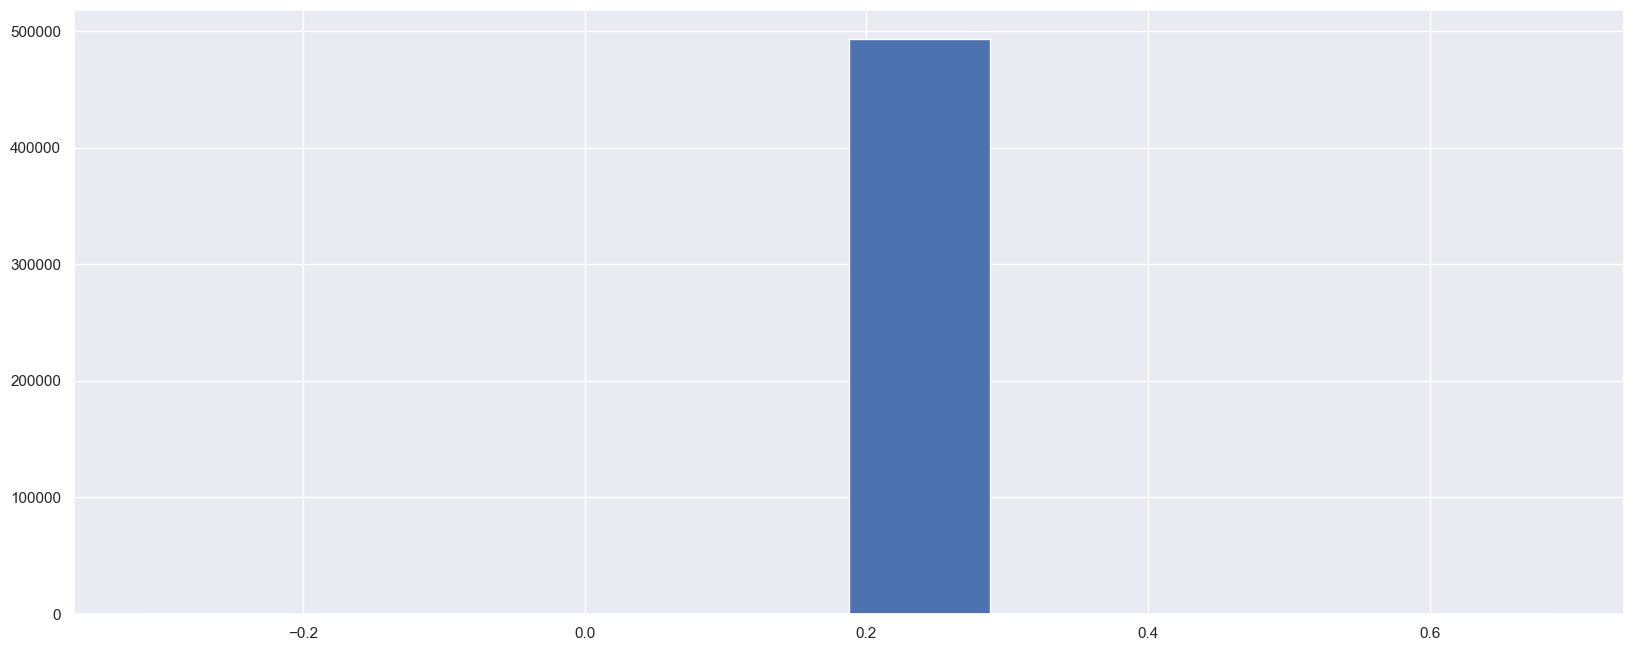

In [ ]:
# gera submissao
print(history)
maior =0.0
for ii in range(len(history)):
    print(history[ii][1])
    if history[ii][1]>maior:
        maior = history[ii][1]
        print(maior)
        max_index = ii
print(max_index)
print(history[max_index][1])
sub = final_predictions[:][max_index]
mysub = pd.DataFrame(scaledTest.index)
mysub['claim'] = sub
mysub['claim'] = mysub['claim'].fillna(0)
print(mysub.mean()*100)
mysub['claim'].hist()
var = 'mistureba_jogada_no_catboost'
mysub.to_csv(var+'_submisssion.csv',index=False)